In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
colName=["Energy", "Veff", "Err"]
# new = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/veff/ARA.txt",names=colName)
old = pd.read_csv("./AraSim_veff_proposal.csv")
pyrex = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/veff/pyrex_veff.csv",names=colName)

In [63]:
# new=new.sort_values(by='Energy')
# old=old.sort_values(by='Energy')
pyrex["Energy"]=pyrex["Energy"].astype(str).astype(float)
# old.to_csv("AraSim_veff_proposal.csv", index=False)

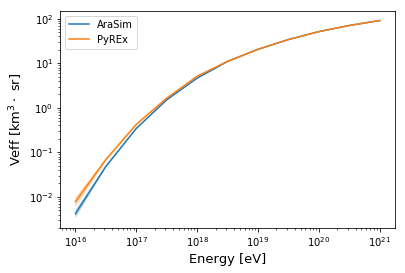

In [64]:
plt.loglog(old["Energy"], old["Veff"], label="AraSim")
plt.fill_between(old["Energy"],old["Veff"]-old["Err"],old["Veff"]+old["Err"], alpha=0.3)
plt.fill_between(pyrex["Energy"],pyrex["Veff"]-pyrex["Err"],pyrex["Veff"]+pyrex["Err"], alpha=0.3)

plt.plot(pyrex["Energy"], pyrex["Veff"], label="PyREx")
# plt.yscale("log")
# plt.xscale("log")
plt.xlabel("Energy [eV]",fontsize=13)
# plt.title("Latest comparison between AraSim/PyREx (Nov 2019)", fontsize=12)
plt.ylabel("Veff [km$^3 \cdot$ sr]",fontsize=13)
plt.legend()
# plt.gca().set_aspect('equal', adjustable='box')

# plt.savefig("/users/PCON0003/cond0068/ARA/veff_comparison.png", dpi=200)

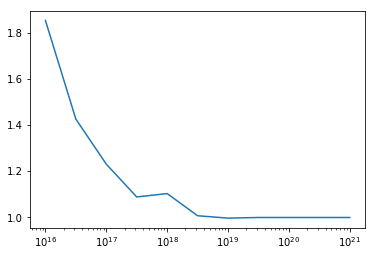

In [67]:
plt.plot(old["Energy"],pyrex["Veff"]/old["Veff"])
plt.xscale('log')

In [68]:
print(pyrex["Veff"]/old["Veff"])

0     1.853935
1     1.426338
2     1.231167
3     1.088942
4     1.103670
5     1.007549
6     0.997285
7     1.000000
8     1.000000
9     1.000000
10    1.000000
Name: Veff, dtype: float64


In [75]:
print("%0.2f"%float(pyrex["Veff"]))

TypeError: cannot convert the series to <class 'float'>

In [80]:
pyrex["Veff"].astype(float)

0      0.007753
1      0.068721
2      0.423534
3      1.646366
4      5.110919
5     11.060770
6     20.530880
7     34.070899
8     51.321619
9     70.347430
10    91.046383
Name: Veff, dtype: float64